# Exploratory Data Analysis

## Imports 

In [1]:
# let's make sure we are using the correct kernel 
import sys; sys.executable

'/Users/vconstan/Files/Projects/tsunami/venv/bin/python'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os 
import pandas as pd
from pathlib import Path
import seaborn as sns
from tqdm.notebook import tqdm

In [3]:
data_path = Path("../data/")

In [4]:
# each folder in the data dir corresponds to a day of data 
day_paths = [data_path / Path(p) for p in os.listdir(data_path) if p != ".DS_Store"]
day_paths

[PosixPath('../data/outputs_303'),
 PosixPath('../data/outputs_304'),
 PosixPath('../data/outputs_302'),
 PosixPath('../data/outputs_300'),
 PosixPath('../data/outputs_301')]

Day `302` is the day of the earthquake. In each folder, there is a file for each satellite in view from a ground station. Therefore, it's possible to have more than one reading per sattelite since it could be tracked from more than one ground station. 

In [5]:
satellite_paths = list()
for dp in day_paths:
    satellite_paths += [dp / Path(p) for p in os.listdir(dp) if p != ".DS_Store"]

In [6]:
len(satellite_paths)

7981

In [7]:
# for each day, generate a heatmap that contains each satellite so we can understand the values of interest better 
days = ["300", "301", "302", "303", "304"]

day_values = list()
for day in days:
    day_paths = [fp for fp in satellite_paths if day in str(fp)]
#     print(len(day_302_paths))

    # gather all of the data of interest 
    stec_dfs = list()
    for sat in tqdm(day_paths):
        df = pd.read_table(sat, index_col="sod", sep="\t\t")
        # rename the column
        sat_name = str(sat).split("/")[-1].split(".")[0]
        ground_station_name = str(sat).split("_")[-1].split(".")[0]
        pass_id = sat_name + "__" + ground_station_name
        df = df.rename(columns={"dsTEC/dt": pass_id})    
        stec_dfs.append(df[[pass_id]])

    # merge all of the dataframes
    stec_values = pd.concat(stec_dfs, axis=1)
    day_values.append(stec_values)

/Users/vconstan/Files/Projects/tsunami/venv/lib/python3.7/site-packages/ipykernel_launcher.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if sys.path[0] == '':


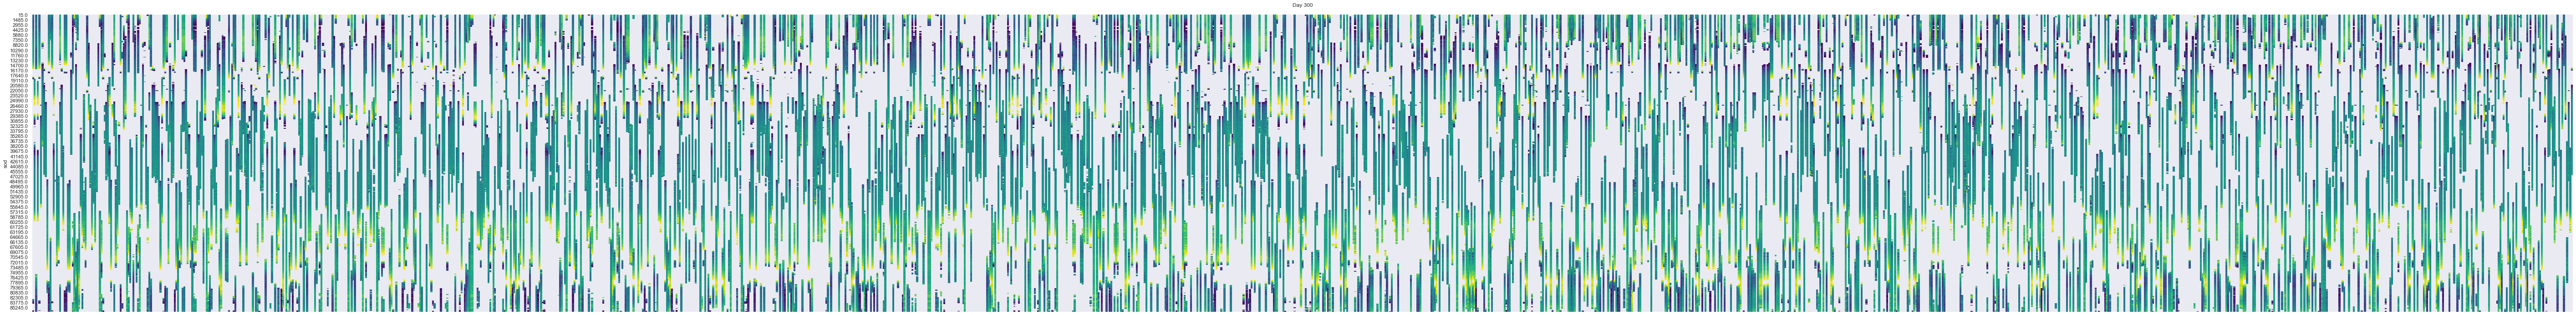

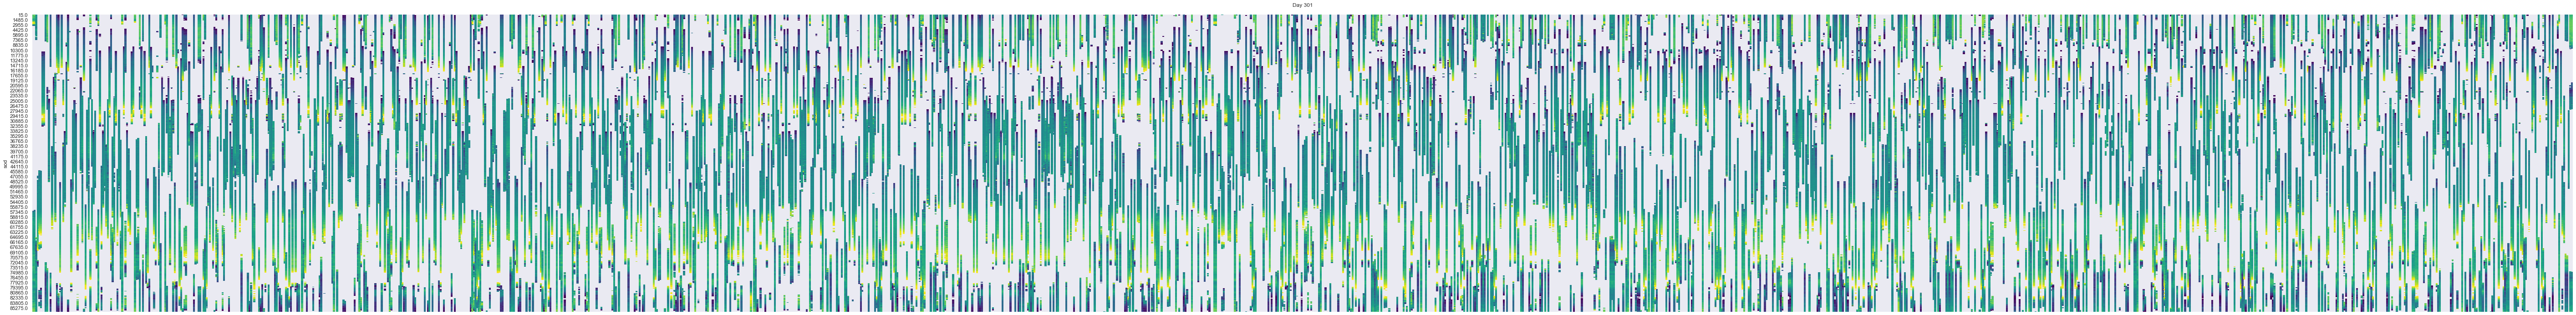

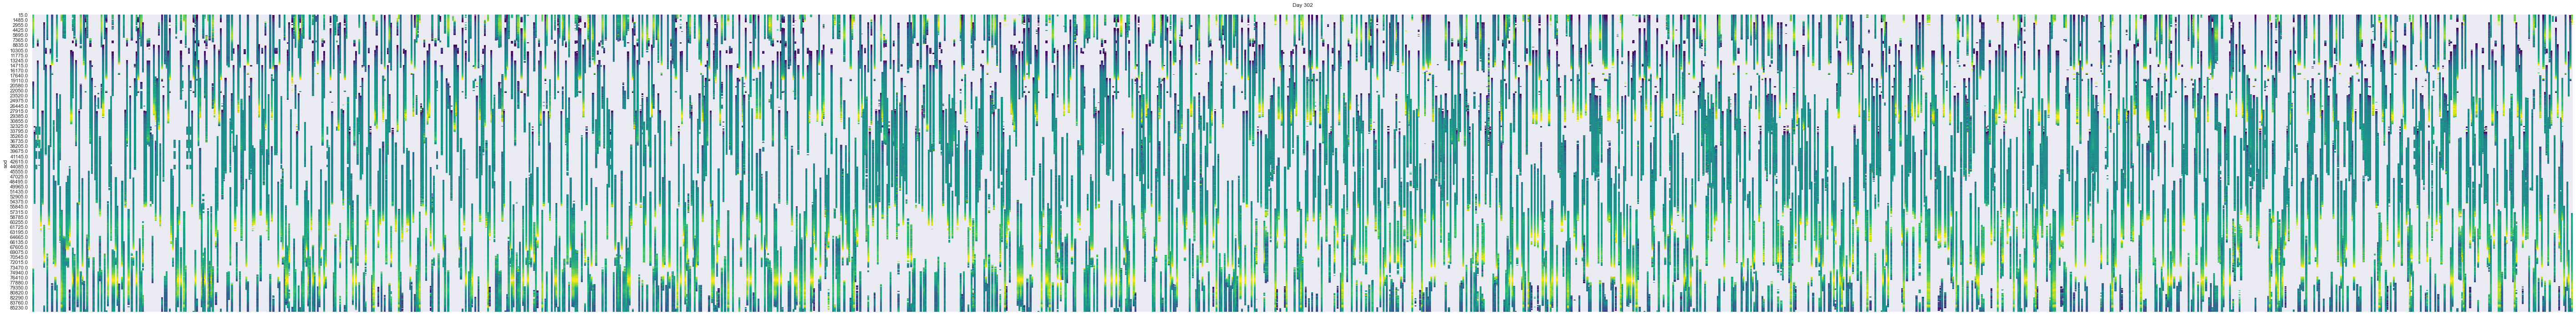

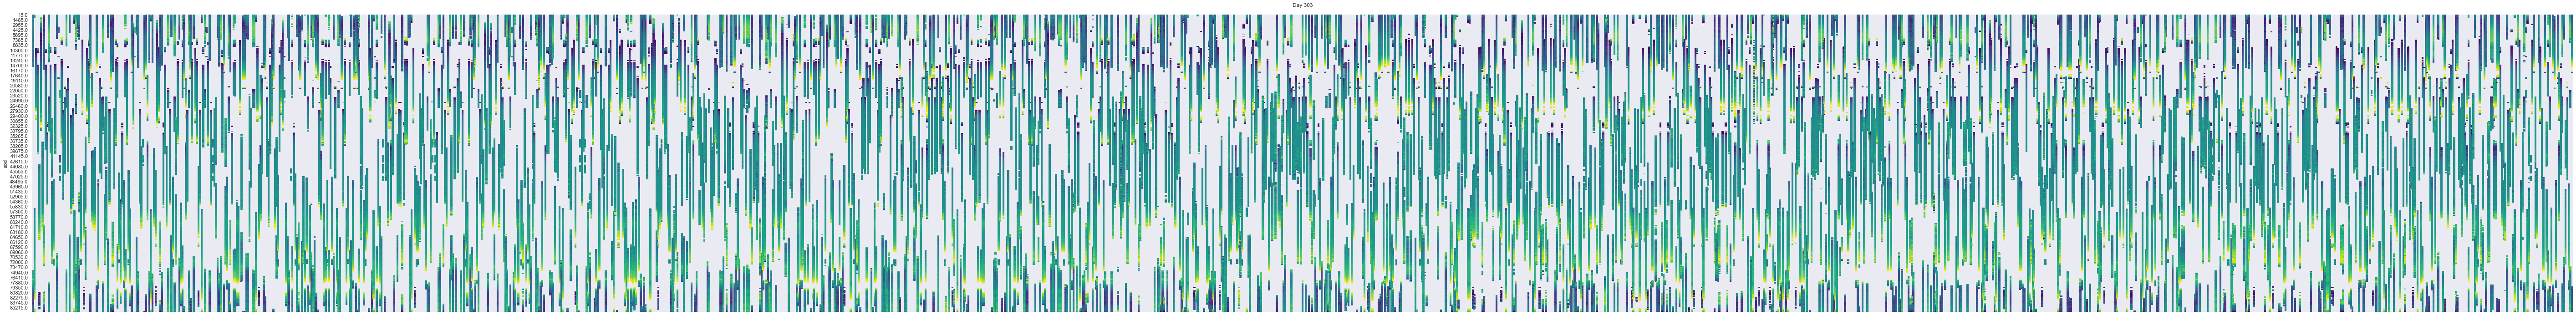

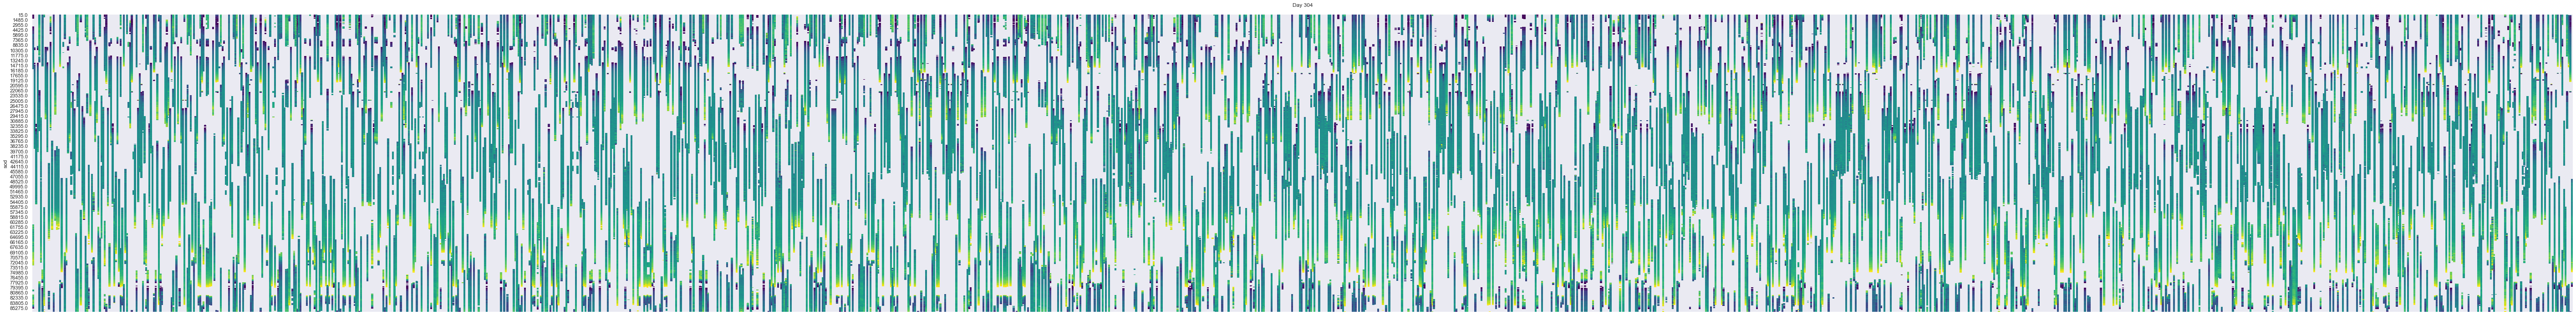

In [8]:
index = 300
for day in day_values:
    sns.set_style("white")
    plt.figure(figsize=(100, 12))
    sns.set(font_scale=1)
    vals = day.astype(float)
    mask = vals.isnull()
    ax = sns.heatmap(vals, mask=mask, cmap="viridis", cbar=False) # .replace(0, np.nan)
    # ax.set_yticks([])
    ax.set_xticks([])
    # ax.yaxis.set_label_position('right') 
    # ax.set(ylabel='\n\n\n\nNumber of Sensor Groups in Anomalous State\n')
    ax.set_title("Day " + str(index) + "\n")
    index += 1

In [9]:
# TODO: which columns are available on which days? 
day_values[2].columns

Index(['mles3020__G30', 'pgf43020__G28', 'pgf33020__G10', 'uwev3020__G20',
       'pgf33020__G04', 'kaep3020__G26', 'uwev3020__G08', 'pgf43020__G14',
       'mlpr3020__G23', 'mles3020__G18',
       ...
       'uwev3020__G11', 'mles3020__G15', 'slpc3020__G02', 'kaep3020__G17',
       'pgf43020__G25', 'mlpr3020__G06', 'mlpr3020__G12', 'pgf43020__G31',
       'kaep3020__G03', 'mles3020__G29'],
      dtype='object', length=1597)

mles3020


Text(0.5, 1.0, 'Day 300, Satellite mles3020\n')

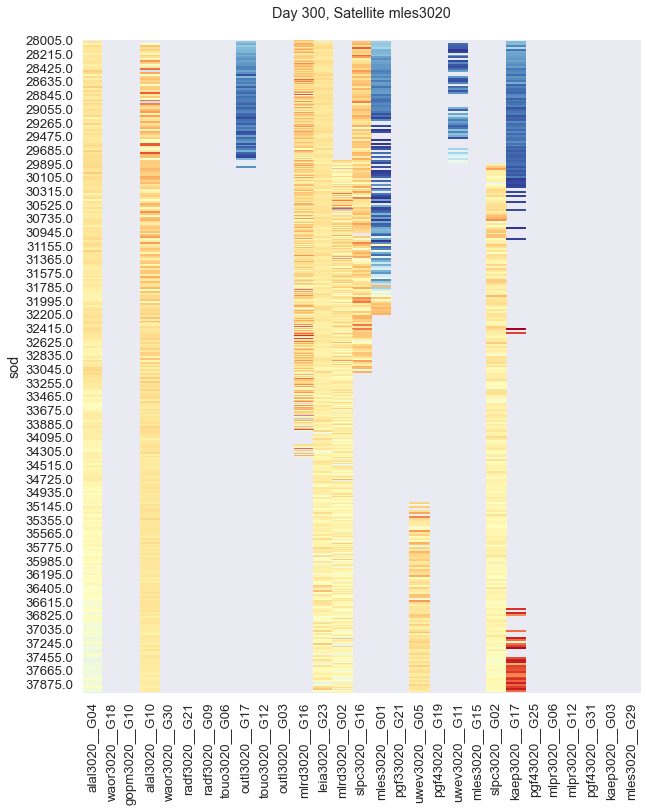

In [13]:
# limit the above visualization to just a particular satellite or particular ground station 
day_index = 2
index = 300
# satellite = "uwev3020"
import random
satellite = random.choice(list(day_values[day_index].columns.values)).split("__")[0]

print(satellite)

subset = day_values[day_index].loc[:, sorted(day_values[day_index].columns.str.contains(satellite))]
subset.tail()

# blep = list(range(30000, 40000))
# subset.loc[subset.index.isin(list(range(30000, 40000)))]

sns.set_style("white")
plt.figure(figsize=(10, 12))
sns.set(font_scale=1.2)
vals = subset.loc[subset.index.isin(list(range(28000, 38000)))].astype(float)
mask = vals.isnull()
ax = sns.heatmap(vals, mask=mask, cmap="RdYlBu", cbar=False) # .replace(0, np.nan)
# ax.set_yticks([])
# ax.set_xticks([])
# ax.yaxis.set_label_position('right') 
# ax.set(ylabel='\n\n\n\nNumber of Sensor Groups in Anomalous State\n')
ax.set_title("Day " + str(index) + ", Satellite " + satellite + "\n")

In [11]:
# the waveform patterns are what we are looking for 

# ground stations observed - G04, G10, G28, G17, G05
# from prev paper - 04, 08, 07, 08, 10, 13, 23

# color scale set to value -.25 to .25


In [12]:
# TODO: line chart multiple separate but together in a group 

In [35]:
# TODO: geomap of ground stations lat / long show sTEC through time animation or at time index